<a href="https://colab.research.google.com/github/AgiAgustianDavi/tubes-analisis-algoritma/blob/main/Tubes_Analisis_Algoritma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from datetime import datetime, timedelta

# Membuat Dataset Tiruan

In [2]:
# Membuat dataset
# Nama depan dan belakang untuk kombinasi acak
first_names = ["Jordan", "Colleen", "Susan", "Gregory", "Andrea", "Daniel", "Jessica", "Michael", "Sarah", "Anthony"]
last_names = ["Rodriguez", "Bishop", "Allen", "Simpson", "Sampson", "Smith", "Johnson", "Williams", "Brown", "Jones"]

# Fungsi untuk membuat nama acak
def random_name():
    return f"{random.choice(first_names)} {random.choice(last_names)}"

# Fungsi untuk membuat tanggal acak
def random_date(start_date, end_date):
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return (start_date + timedelta(days=random_days)).strftime("%d/%m/%Y")

# Parameter dataset
num_records = 10000
start_date = datetime.strptime("01/01/2022", "%d/%m/%Y")
end_date = datetime.strptime("31/12/2022", "%d/%m/%Y")

# Buat data tiruan
data = {
    "ID": range(1, num_records + 1),
    "Nama Pelanggan": [random_name() for _ in range(num_records)],
    "Tanggal Pembelian": [random_date(start_date, end_date) for _ in range(num_records)],
    "Jumlah Pembelian": [random.randint(1, 1000) for _ in range(num_records)]
}
df = pd.DataFrame(data)
df.head()
df.to_csv('dataset_penjualan.csv', index=False)

In [ ]:
records = df.to_dict('records') # list to dict
records[10]

{'ID': 11,
 'Nama Pelanggan': 'Colleen Williams',
 'Tanggal Pembelian': '21/08/2022',
 'Jumlah Pembelian': 186}

# Merge Sort

In [ ]:
# Merge Sort
def merge_sort(arr, key=lambda x:x):
  if len(arr) <= 1:
    return arr
  mid = len(arr) // 2
  left = merge_sort(arr[:mid], key)
  right = merge_sort(arr[mid:], key)
  return merge(left, right, key)

def merge(left,right,key):
  result = []
  i = j = 0
  while i < len(left) and j < len(right):
    if key(left[i]) <= key(right[j]):
      result.append(left[i])
      i += 1
    else:
      result.append(right[j])
      j +=1
  result.extend(left[i:])
  result.extend(right[j:])
  return result

# Quick Sort

In [ ]:
# Quick Sort
def quick_sort(arr, key=lambda x:x):
  if len(arr) <= 1:
    return arr
  pivot = key(arr[len(arr) // 2])
  left = [x for x in arr if key(x) < pivot]
  middle = [x for x in arr if key(x) == pivot]
  right = [x for x in arr if key(x) > pivot]
  return quick_sort(left, key) + middle + quick_sort(right, key)

# Binary Search

In [ ]:
# Binary Search (data wajib terurut)
def binary_search(arr, target, key=lambda x:x):
  low, high = 0, len(arr) -1
  while low <= high:
    mid = (low + high) // 2
    if key(arr[mid]) == target:
      return arr[mid]
    elif key(arr[mid]) < target:
      low = mid + 1
    else:
      high = mid + 1
  return None

# Jump Search

In [ ]:
# Jump Search (Data wajib terurut)
def jump_search(arr, target, key=lambda x:x):
  n = len(arr)
  step = int(np.sqrt(n))
  prev = 0

  while prev < n and key(arr[min(step, n)-1]) < target:
    prev = step
    step += int(np.sqrt(n))
    if prev >= n:
      return None

  for i in range(prev, min(step,n)):
    if key(arr[i]) == target:
      return arr[i]
  return None

# Fungsi Mengukur Waktu

In [ ]:
def ukur_waktu(func, *args, **kwargs):
    start_time = time.perf_counter()
    result = func(*args, **kwargs)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    return result, elapsed_time

# Fungsi menampilkan Grafik

In [ ]:
def bandingkan_waktu_algoritma(
    data,
    algoritma1,
    algoritma2,
    nama_kolom,
    label1="Algoritma 1",
    label2="Algoritma 2",
    judul="Perbandingan Waktu Eksekusi",
    tipe="sort",  # "sort" atau "search"
    data_terurut=None  # Optional: untuk tipe "search"
):
    data_sizes = list(range(1000, 10001, 1000))
    times_1 = []
    times_2 = []

    # Jika tipe search, pastikan data sudah diurutkan
    if tipe == "search":
        if data_terurut is None:
            data = merge_sort(data, key=lambda x: x[nama_kolom])
        else:
            data = data_terurut

    for size in data_sizes:
        subset = data[:size]

        if tipe == "sort":
            _, t1 = ukur_waktu(algoritma1, subset, key=lambda x: x[nama_kolom])
            _, t2 = ukur_waktu(algoritma2, subset, key=lambda x: x[nama_kolom])
        elif tipe == "search":
            target = subset[-1][nama_kolom]
            _, t1 = ukur_waktu(algoritma1, subset, target, key=lambda x: x[nama_kolom])
            _, t2 = ukur_waktu(algoritma2, subset, target, key=lambda x: x[nama_kolom])
        else:
            raise ValueError("Tipe algoritma harus 'sort' atau 'search'.")

        times_1.append(t1)
        times_2.append(t2)

    # Visualisasi hasil
    plt.figure(figsize=(10, 6))
    plt.plot(data_sizes, times_1, marker='o', label=label1)
    plt.plot(data_sizes, times_2, marker='s', label=label2)
    plt.title(judul + f"\n(Berdasarkan Kolom: {nama_kolom})")
    plt.xlabel('Jumlah Data')
    plt.ylabel('Waktu (detik)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Pengujian

## Pengurutan Data Berdasarkan ID

UJI ALGORITMA PENGURUTAN BERDASARKAN ID
============= Hasil Uji Performa =============
Quick Sort Time     : 0.040372 detik
Merge Sort Time     : 0.020934 detik

============= Contoh Output =============
Contoh 3 hasil paling atas Quick Sort  : 
   ID    Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0   1     Michael Allen        10/03/2022               757
1   2  Jordan Rodriguez        07/11/2022               787
2   3     Jordan Bishop        07/11/2022               983

Contoh 3 hasil paling bawah Quick Sort  : 
      ID     Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0   9998    Gregory Johnson        09/08/2022               993
1   9999      Daniel Bishop        03/10/2022               699
2  10000  Jessica Rodriguez        09/09/2022                 9

Contoh 3 hasil paling atas Merge Sort  : 
   ID    Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0   1     Michael Allen        10/03/2022               757
1   2  Jordan Rodriguez        07/11/2022          

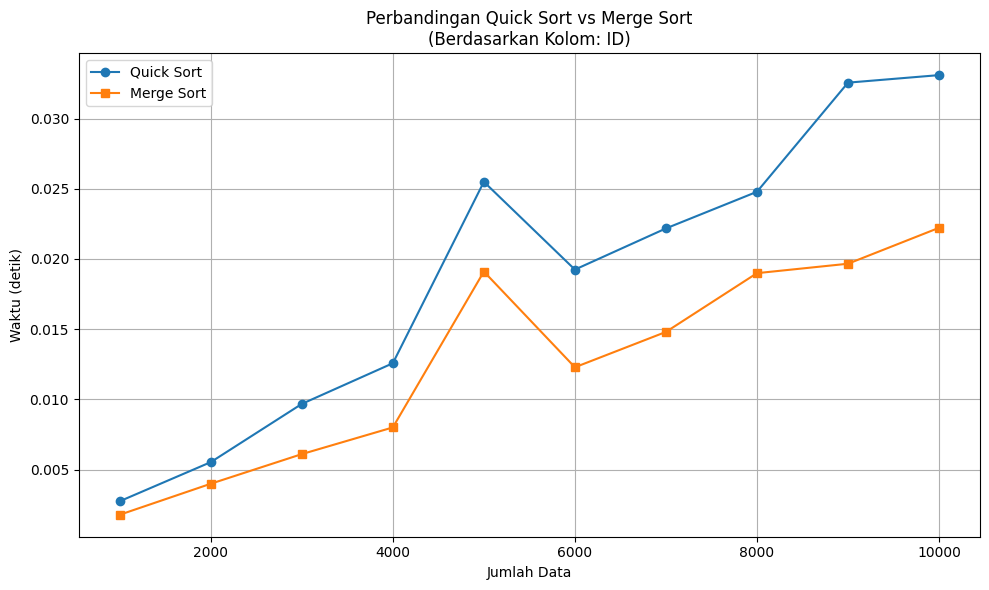

In [ ]:
id_quick, waktu_quick = ukur_waktu(quick_sort, records, key=lambda x: x['ID'])
id_merge, waktu_merge = ukur_waktu(merge_sort, records, key=lambda x: x['ID'])
print("UJI ALGORITMA PENGURUTAN BERDASARKAN ID")
print("============= Hasil Uji Performa =============")
print(f"Quick Sort Time     : {waktu_quick:.6f} detik")
print(f"Merge Sort Time     : {waktu_merge:.6f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh 3 hasil paling atas Quick Sort  : \n{pd.DataFrame(id_quick[:3])}\n")
print(f"Contoh 3 hasil paling bawah Quick Sort  : \n{pd.DataFrame(id_quick[-3:])}\n")
print(f"Contoh 3 hasil paling atas Merge Sort  : \n{pd.DataFrame(id_merge[:3])}\n")
print(f"Contoh 3 hasil paling bawah Merge Sort  : \n{pd.DataFrame(id_merge[-3:])}\n")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=quick_sort,
    algoritma2=merge_sort,
    nama_kolom='ID',
    label1='Quick Sort',
    label2='Merge Sort',
    judul='Perbandingan Quick Sort vs Merge Sort',
    tipe='sort'
)

## Pengurutan Data Berdasarkan Nama Pelanggan

UJI ALGORITMA PENGURUTAN BERDASARKAN NAMA PELANGGAN
============= Hasil Uji Performa =============
Quick Sort Time     : 0.023501 detik
Merge Sort Time     : 0.038503 detik

============= Contoh Output =============
Contoh 3 hasil paling atas Quick Sort  : 
    ID Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  148   Andrea Allen        06/09/2022               294
1  455   Andrea Allen        08/11/2022                68
2  476   Andrea Allen        18/09/2022               746

Contoh 3 hasil paling bawah Quick Sort  : 
     ID  Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  9756  Susan Williams        24/07/2022               840
1  9848  Susan Williams        15/07/2022               822
2  9886  Susan Williams        27/06/2022               216

Contoh 3 hasil paling atas Merge Sort  : 
    ID Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  148   Andrea Allen        06/09/2022               294
1  455   Andrea Allen        08/11/2022                68
2  476   

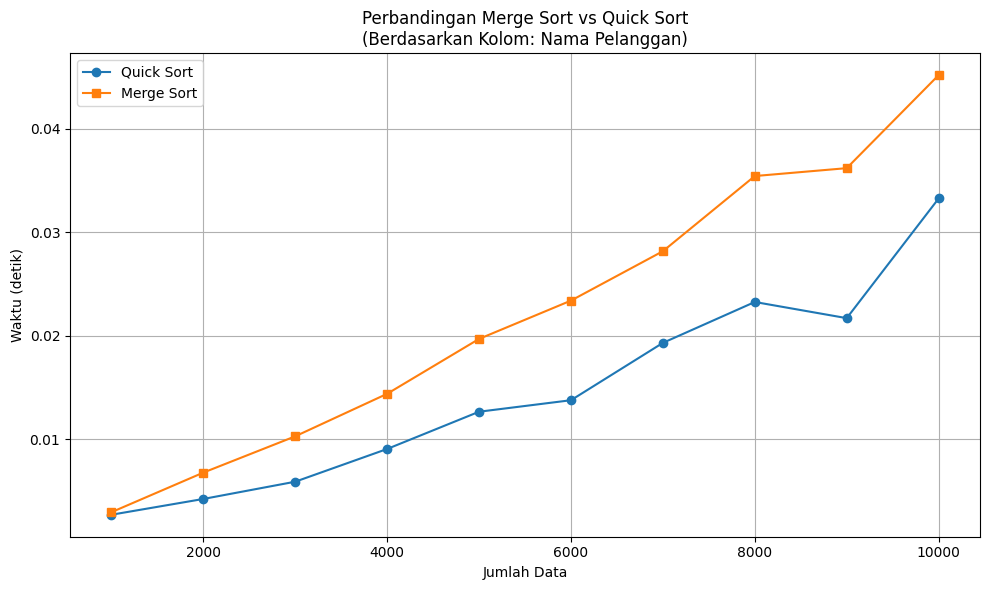

In [ ]:
nama_quick, waktu_quick = ukur_waktu(quick_sort, records, key=lambda x: x['Nama Pelanggan'])
nama_merge, waktu_merge = ukur_waktu(merge_sort, records, key=lambda x: x['Nama Pelanggan'])
print("UJI ALGORITMA PENGURUTAN BERDASARKAN NAMA PELANGGAN")
print("============= Hasil Uji Performa =============")
print(f"Quick Sort Time     : {waktu_quick:.6f} detik")
print(f"Merge Sort Time     : {waktu_merge:.6f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh 3 hasil paling atas Quick Sort  : \n{pd.DataFrame(nama_quick[:3])}\n")
print(f"Contoh 3 hasil paling bawah Quick Sort  : \n{pd.DataFrame(nama_merge[-3:])}\n")
print(f"Contoh 3 hasil paling atas Merge Sort  : \n{pd.DataFrame(nama_merge[:3])}\n")
print(f"Contoh 3 hasil paling bawah Merge Sort  : \n{pd.DataFrame(nama_merge[-3:])}\n")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=quick_sort,
    algoritma2=merge_sort,
    nama_kolom='Nama Pelanggan',
    label1='Quick Sort',
    label2='Merge Sort',
    judul='Perbandingan Merge Sort vs Quick Sort',
    tipe='sort'
)

## Pengurutan Data Berdasarkan Tanggal Pembelian

UJI ALGORITMA PENGURUTAN BERDASARKAN TANGGAL PEMBELIAN
============= Hasil Uji Performa =============
Quick Sort Time     : 0.039761 detik
Merge Sort Time     : 0.038558 detik

============= Contoh Output =============
Contoh 3 hasil paling atas Quick Sort  : 
     ID   Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0   181    Michael Brown        01/01/2022               210
1   577   Susan Williams        01/01/2022               246
2  2159  Gregory Simpson        01/01/2022               688

Contoh 3 hasil paling bawah Quick Sort  : 
     ID     Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  9225    Susan Rodriguez        31/12/2022                52
1  9514  Jessica Rodriguez        31/12/2022               184
2  9971      Gregory Brown        31/12/2022               779

Contoh 3 hasil paling atas Merge Sort  : 
     ID   Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0   181    Michael Brown        01/01/2022               210
1   577   Susan Williams        01

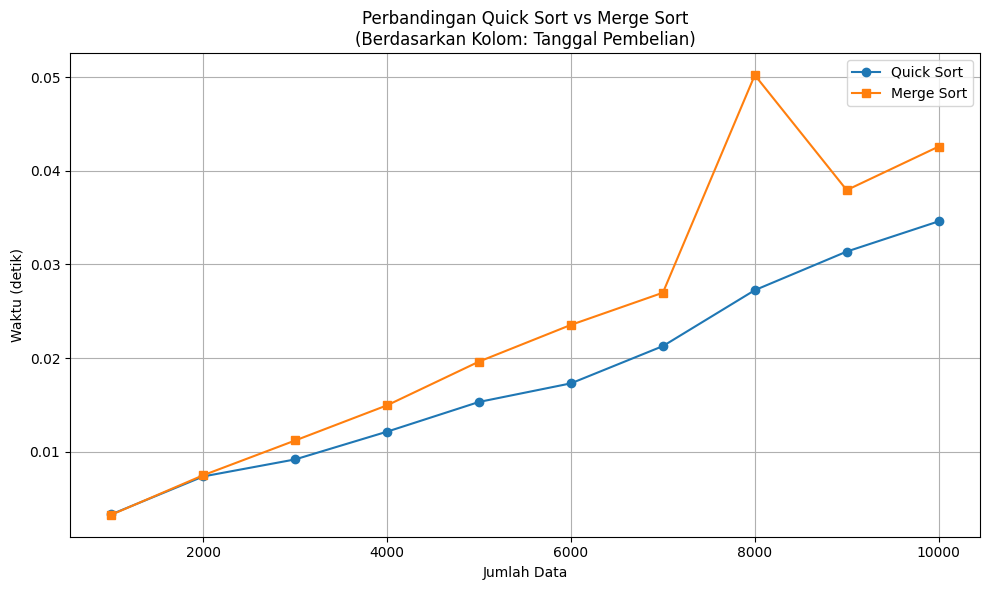

In [ ]:
tanggal_quick, waktu_quick = ukur_waktu(quick_sort, records, key=lambda x: x['Tanggal Pembelian'])
tanggal_merge, waktu_merge = ukur_waktu(merge_sort, records, key=lambda x: x['Tanggal Pembelian'])
print("UJI ALGORITMA PENGURUTAN BERDASARKAN TANGGAL PEMBELIAN")
print("============= Hasil Uji Performa =============")
print(f"Quick Sort Time     : {waktu_quick:.6f} detik")
print(f"Merge Sort Time     : {waktu_merge:.6f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh 3 hasil paling atas Quick Sort  : \n{pd.DataFrame(tanggal_quick[:3])}\n")
print(f"Contoh 3 hasil paling bawah Quick Sort  : \n{pd.DataFrame(tanggal_quick[-3:])}\n")
print(f"Contoh 3 hasil paling atas Merge Sort  : \n{pd.DataFrame(tanggal_merge[:3])}\n")
print(f"Contoh 3 hasil paling bawah Merge Sort  : \n{pd.DataFrame(tanggal_merge[-3:])}")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=quick_sort,
    algoritma2=merge_sort,
    nama_kolom='Tanggal Pembelian',
    label1='Quick Sort',
    label2='Merge Sort',
    judul='Perbandingan Quick Sort vs Merge Sort',
    tipe='sort'
)

## Pengurutan Data berdasaran Jumlah Pembelian

UJI ALGORITMA PENGURUTAN BERDASARKAN JUMLAH PEMBELIAN
============= Hasil Uji Performa =============
Quick Sort Time     : 0.033869 detik
Merge Sort Time     : 0.035576 detik

============= Contoh Output =============
contoh 3 hasil paling atas Quick Sort  : 
    ID    Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  179    Sarah Williams        19/07/2022                 1
1  772     Michael Allen        27/08/2022                 1
2  789  Colleen Williams        13/05/2022                 1

contoh 3 hasil paling bawah Quick Sort  : 
     ID     Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  7469  Anthony Rodriguez        11/08/2022              1000
1  7800   Colleen Williams        30/06/2022              1000
2  9590      Michael Jones        26/10/2022              1000

contoh 3 hasil paling atas Merge Sort  : 
    ID    Nama Pelanggan Tanggal Pembelian  Jumlah Pembelian
0  179    Sarah Williams        19/07/2022                 1
1  772     Michael Allen        27/

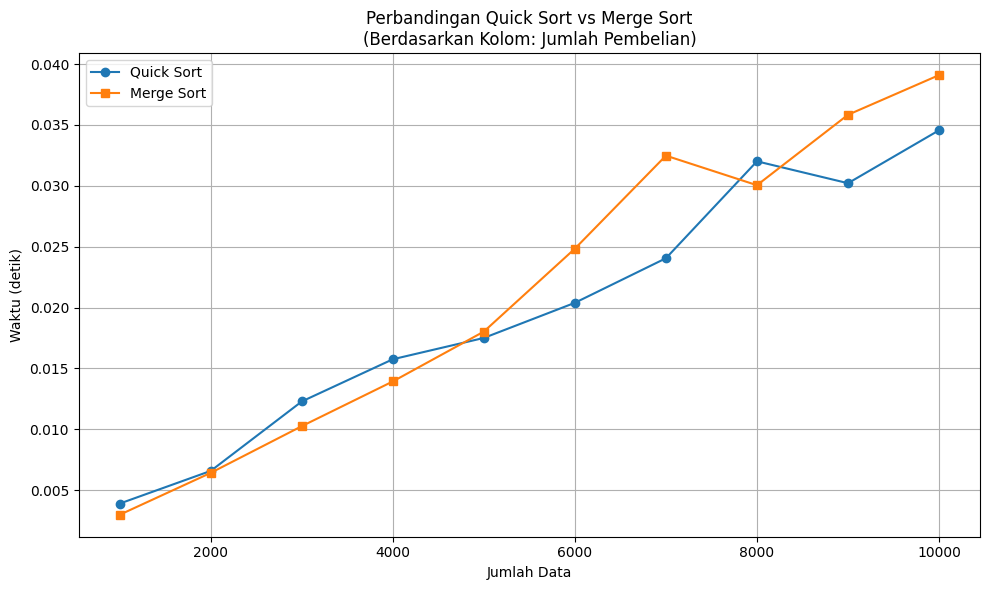

In [ ]:
jumlah_pembelian_quick, waktu_quick = ukur_waktu(quick_sort, records, key=lambda x: x['Jumlah Pembelian'])
jumlah_pembelian_merge, waktu_merge = ukur_waktu(merge_sort, records, key=lambda x: x['Jumlah Pembelian'])
print("UJI ALGORITMA PENGURUTAN BERDASARKAN JUMLAH PEMBELIAN")
print("============= Hasil Uji Performa =============")
print(f"Quick Sort Time     : {waktu_quick:.6f} detik")
print(f"Merge Sort Time     : {waktu_merge:.6f} detik")
print("\n============= Contoh Output =============")
print(f"contoh 3 hasil paling atas Quick Sort  : \n{pd.DataFrame(jumlah_pembelian_quick[:3])}\n")
print(f"contoh 3 hasil paling bawah Quick Sort  : \n{pd.DataFrame(jumlah_pembelian_quick[-3:])}\n")
print(f"contoh 3 hasil paling atas Merge Sort  : \n{pd.DataFrame(jumlah_pembelian_merge[:3])}\n")
print(f"contoh 3 hasil paling bawah Merge Sort  : \n{pd.DataFrame(jumlah_pembelian_merge[-3:])}")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=quick_sort,
    algoritma2=merge_sort,
    nama_kolom='Jumlah Pembelian',
    label1='Quick Sort',
    label2='Merge Sort',
    judul='Perbandingan Quick Sort vs Merge Sort',
    tipe='sort'
)

## Pencarian Berdasarkan ID

UJI ALGORITMA PENCARIAN BERDASARKAN ID
============= Hasil Uji Performa =============
Binary Search Time  : 0.00001365 detik
Jump Search Time    : 0.00006297 detik

============= Contoh Output =============
Contoh Hasil Binary Search  : 
{'ID': 100, 'Nama Pelanggan': 'Jessica Johnson', 'Tanggal Pembelian': '27/09/2022', 'Jumlah Pembelian': 28}

Contoh Hasil Jump Search    : 
{'ID': 100, 'Nama Pelanggan': 'Jessica Johnson', 'Tanggal Pembelian': '27/09/2022', 'Jumlah Pembelian': 28}


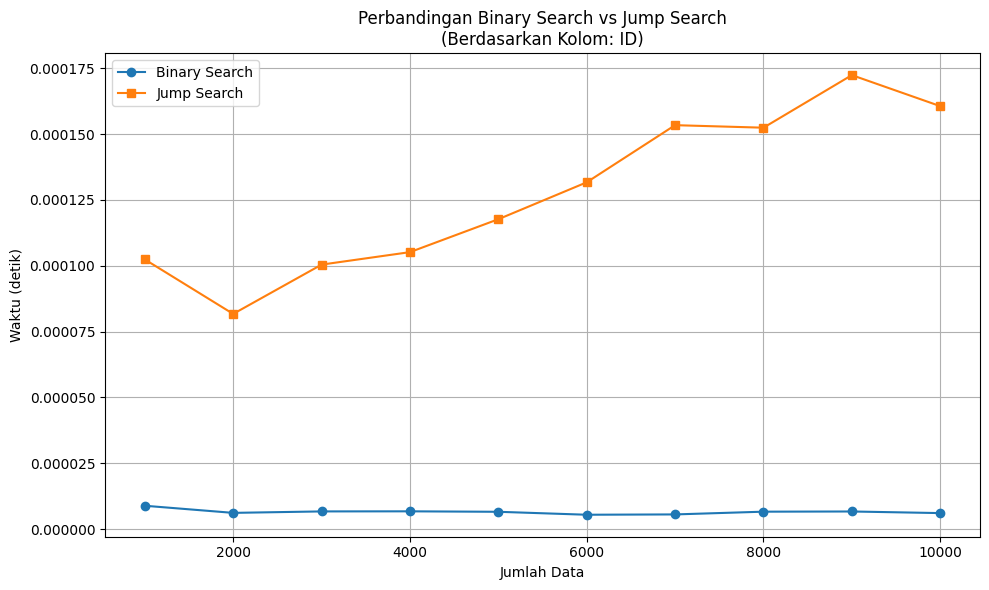

In [ ]:
id_binary, waktu_binary = ukur_waktu(binary_search, id_merge, 100, key=lambda x: x['ID'])
id_jump, waktu_jump = ukur_waktu(jump_search, id_merge, 100, key=lambda x: x['ID'])
print("UJI ALGORITMA PENCARIAN BERDASARKAN ID")
print("============= Hasil Uji Performa =============")
print(f"Binary Search Time  : {waktu_binary:.8f} detik")
print(f"Jump Search Time    : {waktu_jump:.8f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh Hasil Binary Search  : \n{id_binary}\n")
print(f"Contoh Hasil Jump Search    : \n{id_jump}")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=binary_search,
    algoritma2=jump_search,
    nama_kolom='ID',
    label1='Binary Search',
    label2='Jump Search',
    judul='Perbandingan Binary Search vs Jump Search',
    tipe='search',
    data_terurut=id_merge
)

## Pencarian Berdasarkan Nama Pelanggan

UJI ALGORITMA PENCARIAN BERDASARKAN NAMA PELANGGAN
============= Hasil Uji Performa =============
Binary Search Time  : 0.00001107 detik
Jump Search Time    : 0.00022526 detik

============= Contoh Output =============
Contoh Hasil Binary Search  : 
{'ID': 3223, 'Nama Pelanggan': 'Michael Williams', 'Tanggal Pembelian': '08/10/2022', 'Jumlah Pembelian': 642}

Contoh Hasil Jump Search    : 
{'ID': 143, 'Nama Pelanggan': 'Michael Williams', 'Tanggal Pembelian': '28/07/2022', 'Jumlah Pembelian': 548}


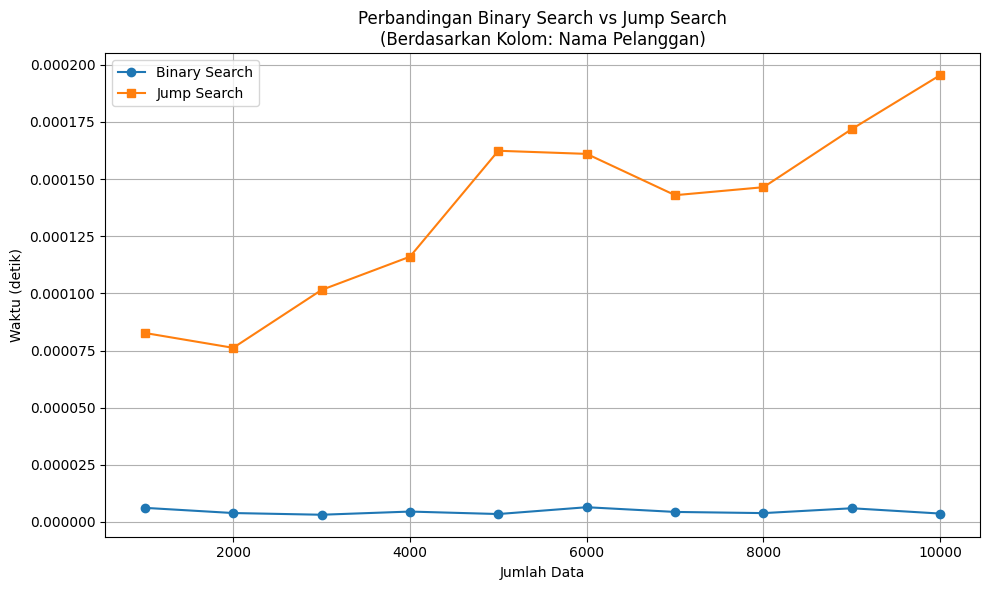

In [ ]:
nama_binary, waktu_binary = ukur_waktu(binary_search, nama_merge, 'Michael Williams', key=lambda x: x['Nama Pelanggan'])
nama_jump, waktu_jump = ukur_waktu(jump_search, nama_merge, 'Michael Williams', key=lambda x: x['Nama Pelanggan'])
print("UJI ALGORITMA PENCARIAN BERDASARKAN NAMA PELANGGAN")
print("============= Hasil Uji Performa =============")
print(f"Binary Search Time  : {waktu_binary:.8f} detik")
print(f"Jump Search Time    : {waktu_jump:.8f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh Hasil Binary Search  : \n{nama_binary}\n")
print(f"Contoh Hasil Jump Search    : \n{nama_jump}")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=binary_search,
    algoritma2=jump_search,
    nama_kolom='Nama Pelanggan',
    label1='Binary Search',
    label2='Jump Search',
    judul='Perbandingan Binary Search vs Jump Search',
    tipe='search',
    data_terurut=nama_merge
)

## Pencarian Berdasarkan Tanggal Pembelian

UJI ALGORITMA PENCARIAN BERDASARKAN TANGGAL PEMBELIAN
============= Hasil Uji Performa =============
Binary Search Time  : 0.00001697 detik
Jump Search Time    : 0.00004825 detik

============= Contoh Output =============
Contoh Hasil Binary Search  : 
{'ID': 5002, 'Nama Pelanggan': 'Anthony Smith', 'Tanggal Pembelian': '01/01/2022', 'Jumlah Pembelian': 839}

Contoh Hasil Jump Search    : 
{'ID': 181, 'Nama Pelanggan': 'Michael Brown', 'Tanggal Pembelian': '01/01/2022', 'Jumlah Pembelian': 210}


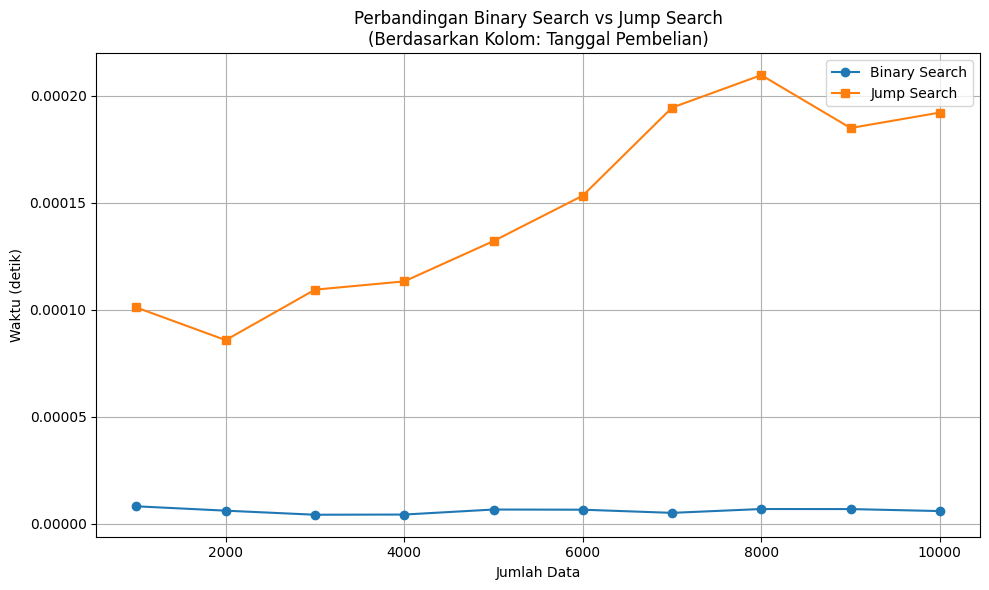

In [ ]:
tanggal_binary, waktu_binary = ukur_waktu(binary_search, tanggal_merge, '01/01/2022', key=lambda x: x['Tanggal Pembelian'])
tanggal_jump, waktu_jump = ukur_waktu(jump_search, tanggal_merge, '01/01/2022', key=lambda x: x['Tanggal Pembelian'])
print("UJI ALGORITMA PENCARIAN BERDASARKAN TANGGAL PEMBELIAN")
print("============= Hasil Uji Performa =============")
print(f"Binary Search Time  : {waktu_binary:.8f} detik")
print(f"Jump Search Time    : {waktu_jump:.8f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh Hasil Binary Search  : \n{tanggal_binary}\n")
print(f"Contoh Hasil Jump Search    : \n{tanggal_jump}")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=binary_search,
    algoritma2=jump_search,
    nama_kolom='Tanggal Pembelian',
    label1='Binary Search',
    label2='Jump Search',
    judul='Perbandingan Binary Search vs Jump Search',
    tipe='search',
    data_terurut=tanggal_merge
)

## Pencarian Berdasarkan Jumlah Pembelian

UJI ALGORITMA PENCARIAN BERDASARKAN JUMLAH PEMBELIAN
============= Hasil Uji Performa =============
Binary Search Time  : 0.00001652 detik
Jump Search Time    : 0.00011780 detik

============= Contoh Output =============
Contoh Hasil Binary Search  : 
{'ID': 273, 'Nama Pelanggan': 'Andrea Jones', 'Tanggal Pembelian': '09/02/2022', 'Jumlah Pembelian': 100}

Contoh Hasil Jump Search    : 
{'ID': 51, 'Nama Pelanggan': 'Susan Brown', 'Tanggal Pembelian': '20/10/2022', 'Jumlah Pembelian': 100}


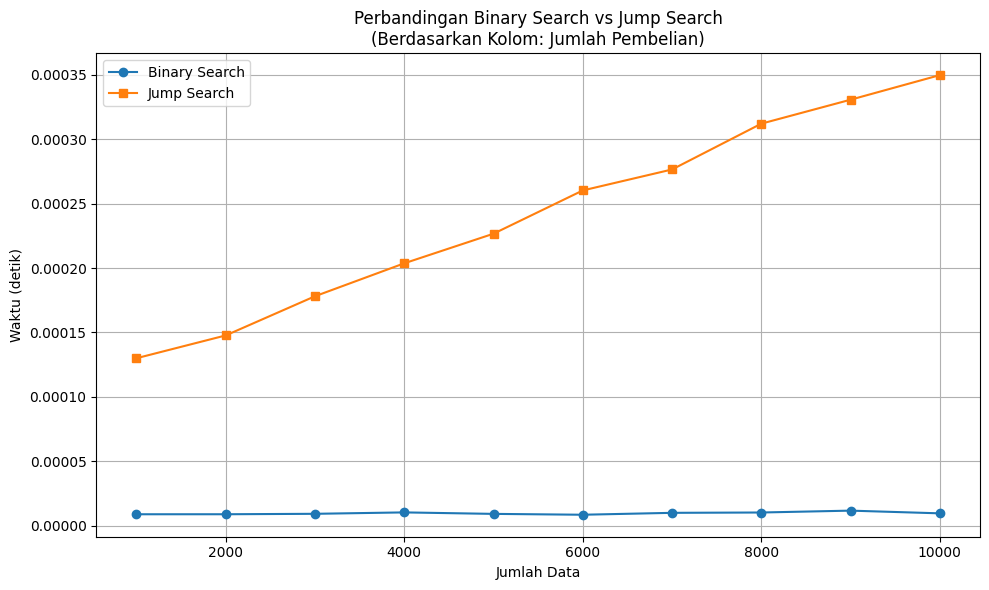

In [ ]:
jumlah_pembelian_binary, waktu_binary = ukur_waktu(binary_search, jumlah_pembelian_merge, 100, key=lambda x: x['Jumlah Pembelian'])
jumlah_pembelian_jump, waktu_jump = ukur_waktu(jump_search, jumlah_pembelian_merge, 100, key=lambda x: x['Jumlah Pembelian'])
print("UJI ALGORITMA PENCARIAN BERDASARKAN JUMLAH PEMBELIAN")
print("============= Hasil Uji Performa =============")
print(f"Binary Search Time  : {waktu_binary:.8f} detik")
print(f"Jump Search Time    : {waktu_jump:.8f} detik")
print("\n============= Contoh Output =============")
print(f"Contoh Hasil Binary Search  : \n{jumlah_pembelian_binary}\n")
print(f"Contoh Hasil Jump Search    : \n{jumlah_pembelian_jump}")

bandingkan_waktu_algoritma(
    data=records,
    algoritma1=binary_search,
    algoritma2=jump_search,
    nama_kolom='Jumlah Pembelian',
    label1='Binary Search',
    label2='Jump Search',
    judul='Perbandingan Binary Search vs Jump Search',
    tipe='search',
    data_terurut=jumlah_pembelian_merge
)